In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
import sys
sys.path.append('/home/dungmaster/Projects/Study/DBP391/Project/fptnewshub/')
from Preprocess.clean_text import tien_xu_li
from Utils import *

## Clean Data

In [2]:
data_dir = '/home/dungmaster/Projects/Study/DBP391/Project/fptnewshub/Data'

In [3]:
# csv_files = glob(data_dir + '/*.csv')
# df_total = pd.DataFrame(columns=['link', 'title', 'time', 'text'])
# weeks = []
# mentions_by_weeks = []

# # read from each csv files
# for fpath in tqdm(sorted(csv_files)):
#     # read and preprocess
#     df = read_csv(fpath)
    
#     # concat each csv file
#     df_total = pd.concat([df_total, df])

In [4]:
df_total = read_csv('../full_news_text.csv')
len(df_total)

57405

In [5]:
# df_total = df_total[df_total['text'].notna() & df_total['time'].notna()]
df_total = df_total[df_total['text'].notna()]

# last_idx = 100
last_idx = len(df_total)
df_subset = df_total[:last_idx]
len(df_subset)

57405

In [8]:
# cleaned_df = pd.DataFrame(columns=['link', 'title', 'time', 'cleaned_text'])
cleaned_df = read_csv('../full_cleaned_news_text.csv')
len(cleaned_df)

35231

In [9]:
for idx, row in tqdm(df_subset.iterrows()):
    text = row.text
    link = row.link
    time = row.time
    try:
        time = convert2datetime(row.time)
    except:
        time = row.time
    if link in cleaned_df['link'].values:
        continue
    text = tien_xu_li(text, no_stwrds=True)
    cleaned_df.loc[len(cleaned_df.index)] = [link, row.title, time, text]

57405it [43:32, 21.97it/s] 


In [10]:
len(cleaned_df)

55247

In [11]:
cleaned_df.head()

,link,title,time,cleaned_text
0,https://hanoi.fpt.edu.vn/mua-he-ruc-ro-chuong-...,MÙA HÈ RỰC RỠ – CHƯƠNG TRÌNH TIẾNG ANH CHUYÊN ...,2023-05-07 14:31:00-05:00,hè bạn sinh_viên đại_học fpt hà_nội cơ_hội nân...
1,https://hanoi.fpt.edu.vn/gap-go-giang-vien-dai...,GẶP GỠ GIẢNG VIÊN ĐẠI HỌC FPT GIÀNH HUY CHƯƠNG...,2023-05-07 15:45:00-05:00,gặp_gỡ giảng_viên đại_học fpt giành huy_chương...
2,https://hanoi.fpt.edu.vn/fes-sportlight-6-lang...,FES-SPORTLIGHT #6 – LẮNG NGHE CHIA SẺ VÀ GIAO ...,2023-05-07 11:23:00-05:00,fes sportlight 6 lắng_nghe chia_sẻ giao_lưu nh...
3,https://hanoi.fpt.edu.vn/nhom-sinh-vien-dai-ho...,Nhóm sinh viên Đại học FPT phát triển sản phẩm...,2023-05-07 10:26:00-05:00,nhóm sinh_viên đại_học fpt phát_triển sản_phẩm...
4,https://hanoi.fpt.edu.vn/nhung-loi-the-khi-so-...,NHỮNG LỢI THẾ KHI SỞ HỮU IELTS 6.0 TRỞ LÊN TẠI...,2023-05-07 15:17:00-05:00,lợi_thế sở_hữu ielts 6 0 trở đại_học fpt mục_t...


In [12]:
# df_total.to_csv('../Data/full_news_text.csv', index=False)
cleaned_df.to_csv('../full_cleaned_news_text.csv', index=False)

## Word Count

In [6]:
cleaned_df = read_csv('../full_cleaned_news_text.csv')
len(cleaned_df)

55247

In [10]:
def word_count(content):
    words_list = content.split()
    return len(content)

In [11]:
cleaned_df['word_count'] = cleaned_df['cleaned_text'].apply(word_count)

In [12]:
cleaned_df.head()

,link,title,time,cleaned_text,word_count
0,https://hanoi.fpt.edu.vn/mua-he-ruc-ro-chuong-...,MÙA HÈ RỰC RỠ – CHƯƠNG TRÌNH TIẾNG ANH CHUYÊN ...,2023-05-07 14:31:00-05:00,hè bạn sinh_viên đại_học fpt hà_nội cơ_hội nân...,1355
1,https://hanoi.fpt.edu.vn/gap-go-giang-vien-dai...,GẶP GỠ GIẢNG VIÊN ĐẠI HỌC FPT GIÀNH HUY CHƯƠNG...,2023-05-07 15:45:00-05:00,gặp_gỡ giảng_viên đại_học fpt giành huy_chương...,3234
2,https://hanoi.fpt.edu.vn/fes-sportlight-6-lang...,FES-SPORTLIGHT #6 – LẮNG NGHE CHIA SẺ VÀ GIAO ...,2023-05-07 11:23:00-05:00,fes sportlight 6 lắng_nghe chia_sẻ giao_lưu nh...,3748
3,https://hanoi.fpt.edu.vn/nhom-sinh-vien-dai-ho...,Nhóm sinh viên Đại học FPT phát triển sản phẩm...,2023-05-07 10:26:00-05:00,nhóm sinh_viên đại_học fpt phát_triển sản_phẩm...,3086
4,https://hanoi.fpt.edu.vn/nhung-loi-the-khi-so-...,NHỮNG LỢI THẾ KHI SỞ HỮU IELTS 6.0 TRỞ LÊN TẠI...,2023-05-07 15:17:00-05:00,lợi_thế sở_hữu ielts 6 0 trở đại_học fpt mục_t...,2551


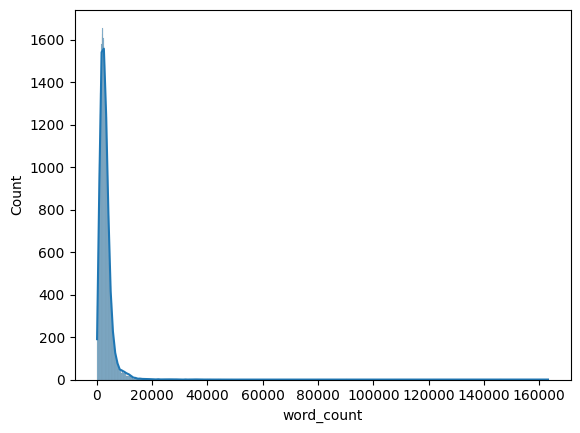

In [14]:
sns.histplot(cleaned_df['word_count'], kde=True)
plt.savefig('../Images/word_count.png')

## Ngrams

In [15]:
from collections import defaultdict

In [16]:
stopwords = open('../Preprocess/stopword.txt', 'r')
stopwords_list = stopwords.read().split('\n')

In [17]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stopwords_list]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

def plot_ngrams(n=1, N=10):
    content_unigrams = defaultdict(int)

    for text in tqdm(cleaned_df['cleaned_text']):
        for word in generate_ngrams(text, n):
            content_unigrams[word] += 1
            
    df_content_unigrams = pd.DataFrame(sorted(content_unigrams.items(), key=lambda x: x[1])[::-1])
    
    sns.barplot(y=df_content_unigrams[0].values[:N], x=df_content_unigrams[1].values[:N])
    
    return df_content_unigrams

100%|██████████| 55247/55247 [03:03<00:00, 300.68it/s]


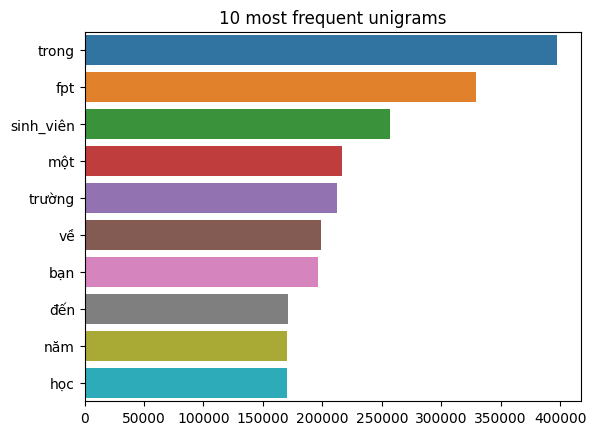

In [18]:
N = 10
# df_content_unigrams = plot_ngrams(n=1, N=N)
df_content_unigrams = read_csv('../Ngrams_CSV/df_content_unigrams.csv')
plt.title(f"{N} most frequent unigrams")
plt.savefig('../Images/unigrams.png')
df_content_unigrams.to_csv('../Ngrams_CSV/df_content_unigrams.csv')

100%|██████████| 55247/55247 [03:02<00:00, 302.24it/s]


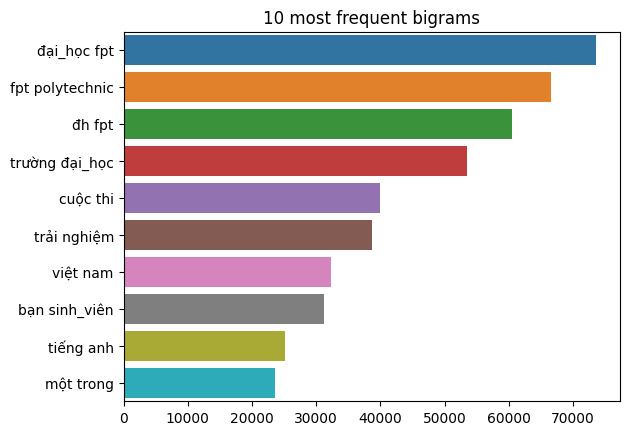

In [20]:
df_content_bigrams = plot_ngrams(n=2, N=N)
# df_content_bigrams = read_csv('../Ngrams_CSV/df_content_bigrams.csv')
plt.title(f"{N} most frequent bigrams")
plt.savefig('../Images/bigrams.png')
df_content_bigrams.to_csv('../Ngrams_CSV/df_content_bigrams.csv')

100%|██████████| 55247/55247 [03:29<00:00, 264.08it/s]


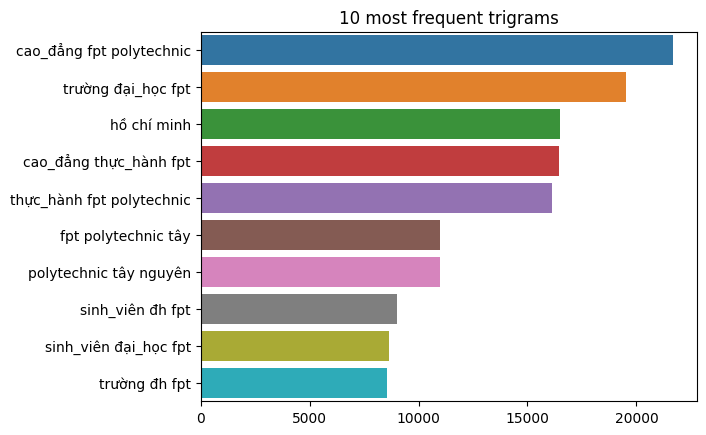

In [21]:
df_content_trigrams = plot_ngrams(n=3, N=N)
# df_content_trigrams = read_csv('../Ngrams_CSV/df_content_trigrams.csv')
plt.title(f"{N} most frequent trigrams")
plt.savefig('../Images/trigrams.png')
df_content_trigrams.to_csv('../Ngrams_CSV/df_content_trigrams.csv')

## Others